# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [3]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [4]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [6]:
# Check how many rows and columns in the dataframe
gas_df.shape


(121, 20)

In [9]:
# Display all the available column names in the dataframe
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [11]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [15]:
gas_df["Month"]=pd.to_datetime(gas_df["Month"])


### Check your code

In [17]:
month_type = gas_df['Month'].dtype

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

In [21]:
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



In [23]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int32

In [25]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int32

---

## Yearly Gas production

In [27]:
gas_df["Year"] = gas_df["Month"].dt.year
gas_df["Year"]


0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
116    2018
117    2018
118    2018
119    2018
120    2018
Name: Year, Length: 121, dtype: int32

In [30]:
yearly_gas_df = gas_df.groupby("Year").sum(numeric_only=True)

### Check your code

In [33]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



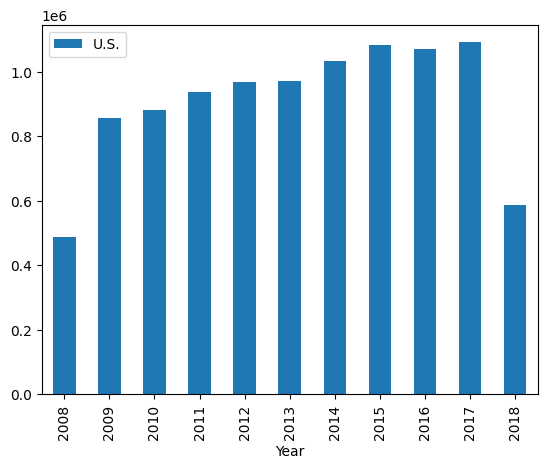

In [37]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year");

In [39]:
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


In [44]:
years = yearly_gas_df.index
years
mask = np.logical_and(years > years.min(), years < years.max())
filtered_yearly_gas_df = yearly_gas_df[mask]
filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


### Check your code

In [45]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master



## State production

Let's have a look at the yearly production of some specific states

In [47]:
filtered_yearly_gas_df.columns[1:].sort_values()


Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

In [49]:
filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


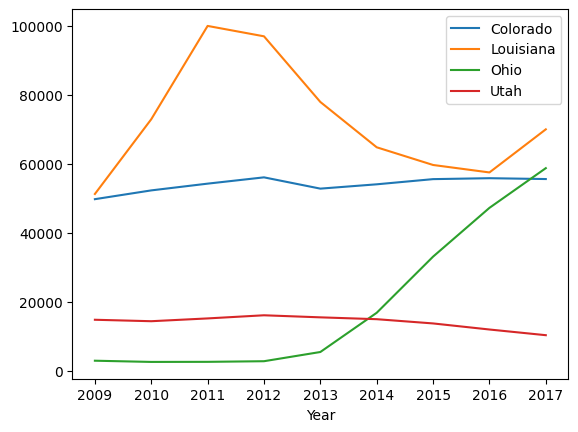

In [56]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year");

In [51]:
filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Year,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


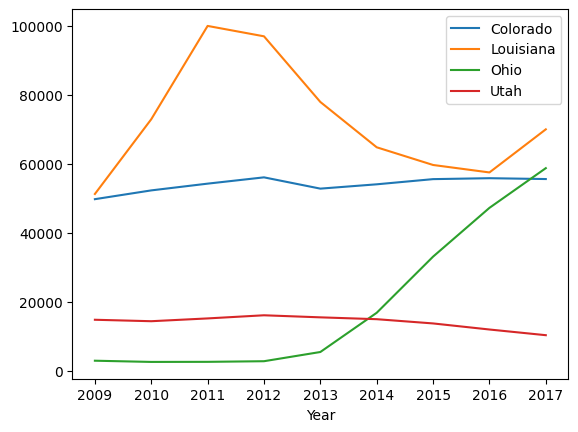

In [55]:
plot = filtered_yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()

---

## Comparing with Crude Oil Production

In [65]:
oil_df=pd.read_csv("data/U.S._crude_oil_production.csv")
oil_df
oil_df["Month"] = pd.to_datetime(oil_df["Month"])
print(oil_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Month                                      121 non-null    datetime64[ns]
 1   U.S. Crude Oil                             121 non-null    int64         
 2   Alabama                                    121 non-null    int64         
 3   Alaska                                     121 non-null    int64         
 4   Arkansas                                   121 non-null    int64         
 5   Arizona                                    121 non-null    int64         
 6   California                                 121 non-null    int64         
 7   Colorado                                   121 non-null    int64         
 8   Federal Offshore Gulf of Mexico Crude Oil  121 non-null    int64         
 9   Federal Offshore Paci

---

## Yearly Oil production

In [66]:
oil_df

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1


In [116]:
# 1️⃣ Regrouper par année
yearly_oil_df = (
    oil_df
      .groupby(oil_df["Month"].dt.year)  # regroupe toutes les lignes d'une même année
      .sum(numeric_only=True)            # additionne uniquement les colonnes numériques
)

# 2️⃣ Nettoyer les noms de colonnes (souvent il reste des espaces à la fin)
yearly_oil_df.columns = yearly_oil_df.columns.str.strip()

# 3️⃣ Vérification rapide
print(yearly_oil_df.head())

       U.S. Crude Oil  Alabama  Alaska  Arkansas  Arizona  California  \
Month                                                                   
2008            34211      149    4666       118        0        4095   
2009            64180      236    7749       189        0        6815   
2010            65741      234    7199       189        0        6588   
2011            67829      275    6742       195        0        6449   
2012            78007      312    6310       214        0        6465   

       Colorado  Federal Offshore Gulf of Mexico Crude Oil  \
Month                                                        
2008        589                                       7302   
2009        998                                      18727   
2010       1086                                      18640   
2011       1295                                      15805   
2012       1626                                      15189   

       Federal Offshore Pacific Crude Oil  Florida  .

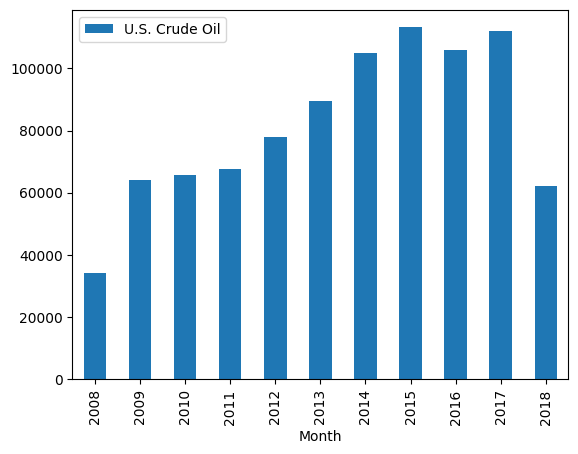

In [118]:
yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar');

In [119]:
yearly_oil_df

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2008,34211,149,4666,118,0,4095,589,7302,465,37,...,98,1286,56,35,1013,39,0,438,7773,7
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12
2010,65741,234,7199,189,0,6588,1086,18640,713,56,...,156,2239,108,53,1771,59,0,809,14026,12
2011,67829,275,6742,195,0,6449,1295,15805,652,67,...,156,2534,114,53,1795,72,0,864,17393,12
2012,78007,312,6310,214,0,6465,1626,15189,580,71,...,168,3095,144,60,1900,85,0,991,23742,12
2013,89585,342,6182,218,0,6540,2175,15068,610,72,...,264,3786,174,60,2088,237,0,1152,30475,12
2014,105064,323,5958,224,0,6729,3139,16761,608,73,...,495,4605,222,60,2501,340,0,1346,38049,12
2015,113179,318,5796,205,0,6619,4036,18174,378,72,...,876,5484,232,53,2842,380,0,1222,41335,12
2016,105970,266,5874,183,0,6101,3820,19177,201,63,...,705,5102,207,47,2380,251,0,1001,38140,12


In [121]:
# 1) Agréger par année
yearly_oil_df = (
    oil_df
    .groupby(oil_df["Month"].dt.year)
    .sum(numeric_only=True)
)
yearly_oil_df.columns = yearly_oil_df.columns.str.strip()

# 2) Années complètes (12 mois)
year_counts = oil_df["Month"].dt.year.value_counts().sort_index()
valid_years = year_counts[year_counts == 12].index

filtered_yearly_oil_df = yearly_oil_df.loc[valid_years]

In [123]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master

